#### Hello Team, I think this is your first encounter with neural networks. This mini-project is to help you understand the various steps of learning with a neural network. This time, together you'll create a simple feed-forward neural net. Complexity of the neural nets that you'll create will keep increasing with time.

#### The learning problem: We'll try to create an AI that can recognize handwritten digits in the famous MNIST database (the same one 3Blue1Brown's video series on neural networks is based on, if you haven't watched at least the first two videos in the series, I can guarantee you that you won't find a more clear/visual explanation on the web).

#### How it's going to work: Below I have laid out the different steps in the process. Every member's task is to write the part of the code that he/she has been assigned to. If your understanding of how an ANN works is clear, hopefully all your contributions will wake up our AI (even if you don't communicate with each other!). 

#### We'll be using Keras to implement the neural network as I've said before. Steps are of course sequential. Good luck!

# ref: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [0]:
# import the dataset
import tensorflow as tf 
import os
import numpy as np
import tensorflow_datasets as tfds
from keras.datasets import mnist# <--- My contribution to our little AI
import time
(trainX, trainy), (testX, testy) = mnist.load_data()



In [10]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.98.119.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.98.119.210:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [0]:
# Step - 1: Create the data pipeline to feed the network (To be done by member 1)
"""
You have an image (or loads of them) which will give you a numeric feature vector that 
can be fed to the input layer of the neural net. But is that all the network is hungry for? No.
It also requires a label for the image, in this case 0 or 1 or ... or 9. But the output layer of a 
neural net is often a probability distribution (meaning the sum of all the node-values or the 
activations of the output layer is 1) and the number of nodes in the output layer = number of 
different possible labels or class which for this case is 10. This means that you can interpret the 
activation of the j-th node in the output layer as the probability that the input belongs to the 
j-th class or has the j-th label. If you think about the cost function, you'll understand that we 
should convert our rudimentary labels into probability vectors too. So an image depicting 2 should 
have the label (0,0,1,0,...,0).
"""

"""
Your mission should you choose to accept it, is to:
1. Create a Python object called digits having two attributes train, test
2. Make sure digit.train and digit.test are objects of the same type having two 
attributes features(=array of all the feature vectors) and labels(=array of all the label vectors).
Every element of features is a numeric array representing an image 
(might be an array of greyscale intensity, might be something else).
"""
class Dataset():
    def __init__(self,train,test):
        self.train = train
        self.test = test
class Data():
    def __init__(self,features,labels):
        self.features = (features.astype('float32')/ 255.0).reshape(features.shape[0], 28, 28, 1)
        new_labels=np.zeros([labels.shape[0],10])
        #trainY = to_categorical(trainY)
        #testY = to_categorical(testY)
        for i,label in enumerate(labels):
            new_labels[i,label]=1
        self.labels= new_labels 

In [0]:

train=Data(trainX,trainy)
test=Data(testX,testy)
digits=Dataset(train,test)
# to import train features: digits.train.features
# to import train features: digits.train.labels


In [13]:
#from keras.models import Sequential
#from tf.keras.layers import Flatten,Dense,Activation, Conv2D, MaxPooling2D
#from keras.optimizers import SGD
# Step - 2: Design the network (To be done by member 2)
start = time.time()
with strategy.scope():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(tf.keras.layers.MaxPooling2D((2, 2)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # compile model
    #opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

    #Now train the data on the training Data Set and evlaute on test Data set
  learning_history=model.fit(digits.train.features,train.labels,batch_size=200,epochs=100,shuffle=True,validation_split=.1)

# Saving the model
#model.save('knowledge_CNN.h5')

# If one wants to delete the current model in memory
#del model
end = time.time()
print("Time taken to learn: {}". format(end-start))


Epoch 1/100
270/270 [==============================] - 3s 11ms/step - accuracy: 0.8521 - loss: 0.5850 - val_accuracy: 0.9307 - val_loss: 0.2763
Epoch 2/100
270/270 [==============================] - 3s 10ms/step - accuracy: 0.9164 - loss: 0.3031 - val_accuracy: 0.9428 - val_loss: 0.2195
Epoch 3/100
270/270 [==============================] - 3s 10ms/step - accuracy: 0.9294 - loss: 0.2535 - val_accuracy: 0.9503 - val_loss: 0.1902
Epoch 4/100
270/270 [==============================] - 3s 11ms/step - accuracy: 0.9368 - loss: 0.2235 - val_accuracy: 0.9565 - val_loss: 0.1707
Epoch 5/100
270/270 [==============================] - 3s 10ms/step - accuracy: 0.9430 - loss: 0.2012 - val_accuracy: 0.9590 - val_loss: 0.1588
Epoch 6/100
270/270 [==============================] - 3s 10ms/step - accuracy: 0.9476 - loss: 0.1848 - val_accuracy: 0.9635 - val_loss: 0.1441
Epoch 7/100
270/270 [==============================] - 3s 10ms/step - accuracy: 0.9523 - loss: 0.1705 - val_accuracy: 0.9648 - val_loss:

In [0]:

# Saving the model
model.save('knowledge_CNN.h5')


In [17]:
# Step - 3: Save/Load and Test our AI (To be done by member 3)
# Loading the model
#from keras.models import load_model
#our_1st_ai=tf.load_model('knowledge_CNN.h5')

"""
Last but not the least:
1. Save our model as knowledge.h5 file in the same folder as this notebook for future use.
2. Load the neural network saved in knowledge.h5 into an object named our_1st_ai.
3. Output the accuracy score of our_1st_ai on the training and test samples separately.
4. Plot the loss function and model accuracy as a function of epochs using learning_history. 
"""

score_test,acc_test=model.evaluate(digits.test.features,digits.test.labels,batch_size=100)
score_train,acc_train=model.evaluate(digits.train.features,digits.train.labels,batch_size=100)
print('Train score:%.4f '%score_train,'Test Score: %.4f '%score_test)
print('Train Accuracy: %.2f'%(acc_train*100),'Test Accuracy: %.2f'%(acc_test*100))

600/600 [==============================] - 6s 10ms/step - accuracy: 0.9961 - loss: 0.0201
Train score:0.0201  Test Score: 0.0433 
Train Accuracy: 99.61 Test Accuracy: 98.66


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['loss'])
plt.title('model accuracy')
plt.axhline(1,linestyle='dashed')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='best')
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f639841d2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f639841d978>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6398410eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f639841dda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f63983aa390>],
 'means': []}

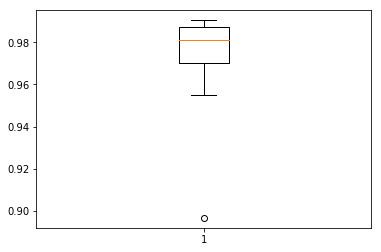

In [0]:
plt.boxplot(model.history.history['accuracy'])


In [0]:
# make a prediction for a an image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape( 1,28, 28,1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('knowledge_CNN.h5')
    # predict the class
    digit = model.predict_classes(img)
    print(digit[0])
# entry point, run the example
run_example()

/home/srashti/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


7
